In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
dataset = pd.read_csv(r'iris.csv')
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
dataset.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
dataset.sum().isnull()

sepal.length    False
sepal.width     False
petal.length    False
petal.width     False
variety         False
dtype: bool

# Standarisation des données :

Étant donné que l'ACP produit un sous-espace de caractéristiques qui maximise la variance le long des axes, il est logique de normaliser les données, en particulier si elles ont été mesurées à différentes échelles.

In [6]:
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
x = dataset.loc[:, features].values

In [7]:
y = dataset.loc[:,['variety']].values

In [8]:
x = StandardScaler().fit_transform(x)

L'affichage des données après la standarisation :

In [9]:
pd.DataFrame(data = x, columns = features).head()

,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# L'utilisation du PCA :

In [10]:
pca = PCA(n_components=2)

In [11]:
principalComponents = pca.fit_transform(x)

In [12]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2'])

In [13]:
principalDf.head()

,PCA1,PCA2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [14]:
dataset[['variety']].head()

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [15]:
finalDf = pd.concat([principalDf, dataset[['variety']]], axis = 1)
finalDf.head()

,PCA1,PCA2,variety
0,-2.264703,0.480027,Setosa
1,-2.080961,-0.674134,Setosa
2,-2.364229,-0.341908,Setosa
3,-2.299384,-0.597395,Setosa
4,-2.389842,0.646835,Setosa


# La visualisation des données après l'utilisation du PCA :

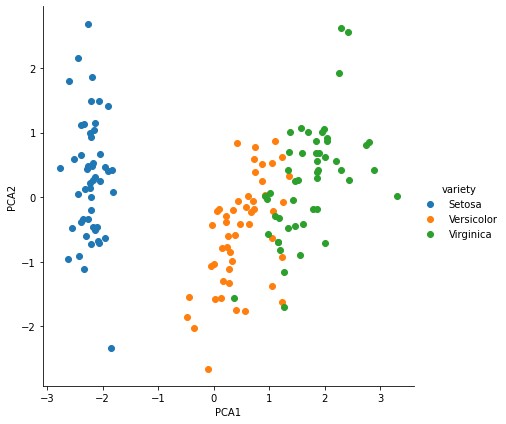

In [20]:
import seaborn as sns
sns.FacetGrid(finalDf, hue="variety", size=6).map(plt.scatter, 'PCA1', 'PCA2').add_legend()
plt.show()

Comme vous voyez, 

In [17]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

Les deux composantes principales ont pu afficher plus de 95% des données.